In [1]:
from fastai.vision.all import *
from fastai.basics import *
from fastai.callback.all import *
import os

In [2]:
folders=['gallic_roman','corinthian_greek']
files=['gallic_roman.txt','corinthian_greek.txt']

In [36]:
classes=['gallic_roman','corinthian_greek']

In [37]:
path=Path('helmets')
path.mkdir(parents=True,exist_ok=True)

In [14]:
for i , n in enumerate(classes):
    print(n)
    path_f=Path(files[i])
    download_images(path/n,path_f,max_pics=50)

gallic_roman


corinthian_greek


In [15]:
imgs=L()
for n in classes:
    print(n)
    path_n=path/n
    imgs+=verify_images(path.ls())

gallic_roman


corinthian_greek


In [38]:
imgs

(#4) [Path('helmets/corinthian_greek'),Path('helmets/gallic_roman'),Path('helmets/corinthian_greek'),Path('helmets/gallic_roman')]

In [39]:
helmets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label,
                  batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

In [45]:
dls = birds.dataloaders(path,  bs=32,num_workers = 0)

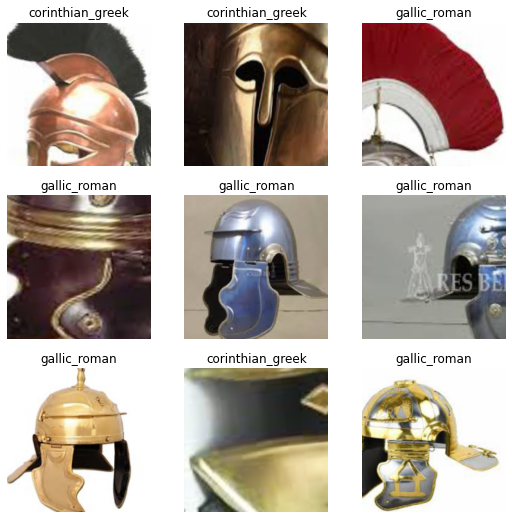

In [46]:
dls.show_batch(max_n=9)

In [47]:
dls.vocab

(#2) ['corinthian_greek','gallic_roman']

In [50]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()

In [54]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.216977,0.112468,0.055556,00:00
1,0.134632,0.124145,0.055556,00:00
2,0.124711,0.130722,0.055556,00:01
3,0.106888,0.122097,0.055556,00:00


In [52]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [55]:
learn.unfreeze()

SuggestedLRs(lr_min=5.248074739938602e-06, lr_steep=1.3182567499825382e-06)

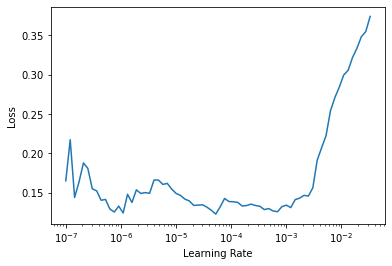

In [62]:
learn.lr_find()

In [64]:
learn.fit_one_cycle(6, lr_max=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.013527,0.157651,0.055556,00:01
1,0.062554,0.146456,0.055556,00:01
2,0.079384,0.142053,0.055556,00:01
3,0.077677,0.146735,0.055556,00:01
4,0.104043,0.143512,0.055556,00:01
5,0.115610,0.151719,0.055556,00:01
